In [55]:
import anndata as ad
import csv
import numpy as np
import pandas as pd
import scanpy as sc
from scipy.sparse import csr_matrix

In [56]:
# OLINK_total = pd.read_csv('../../data/2-updated_OLINK_data_nanToZero.csv')
OLINK_total = pd.read_csv('../../data/2-updated_OLINK_data_withOutlier_nanToZero.csv')
OLINK_total.shape

(41449, 2920)

In [57]:
OLINK_total.head()

,Id,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
0,1000221,0.757567,1.059738,0.815933,0.763303,0.911962,0.988546,0.661753,0.497269,1.032355,...,0.856418,0.818377,0.875872,0.808958,1.000000,0.829799,2.176731,1.150268,0.000000,0.000000
1,1000326,2.583606,2.293678,0.000000,0.000000,0.940864,0.816711,0.941631,1.968941,0.968208,...,1.015154,1.980759,0.743593,2.055729,2.281750,0.000000,2.056565,0.985895,0.734873,0.000000
2,1000662,1.042251,1.417310,0.940098,0.967622,1.076896,1.092434,1.242879,0.807585,1.054544,...,1.123415,1.348269,0.834863,1.147824,1.316108,1.107852,0.452451,0.964498,0.969676,1.186373
3,1000823,1.391736,1.279477,0.871398,1.103463,1.140979,1.412810,0.917597,1.007419,1.104586,...,0.987505,1.353375,0.934770,1.208649,1.212596,0.889118,1.657512,1.032764,0.871443,1.258823
4,1000945,0.910838,0.286904,0.736551,0.884847,0.933054,0.749714,0.000000,0.000000,0.890822,...,0.812096,0.526413,0.859511,0.316076,0.456966,0.722186,1.486522,0.849878,3.465817,1.057866


<!-- ### Get the sub dataset -->

In [58]:
# small_df = OLINK_total.sample(frac=0.2, random_state=66)
small_df = OLINK_total.sample(frac=1, random_state=0)
small_df.shape

(41449, 2920)

In [59]:
small_df

,Id,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
31673,4823545,0.515772,0.381700,1.031486,0.903184,1.100739,1.487487,1.169187,0.664221,0.971242,...,0.966987,0.727280,1.232914,0.642984,1.015027,1.139777,0.868138,1.216323,1.176923,1.044207
9512,2159778,1.431867,0.590853,0.991177,1.102661,1.177983,1.521873,1.253591,1.075004,1.053092,...,0.850434,0.725915,0.766945,0.720337,0.618549,1.141909,1.510167,1.007796,0.447227,1.513998
1402,1170926,0.759366,0.943406,1.087026,0.756914,0.981964,1.057242,0.000000,0.000000,0.842777,...,0.944990,1.044722,1.321921,0.937419,1.073455,0.940960,1.138794,1.150405,1.216153,0.846410
28800,4471988,0.977872,1.059426,1.248836,1.310640,0.886889,0.892528,1.284128,2.013248,0.844061,...,1.029342,0.906818,0.995681,1.352645,0.915152,1.061820,1.124389,0.892528,1.359989,1.132528
271,1033131,0.835104,0.572800,1.004557,1.219345,1.056723,1.319852,0.933554,1.228266,0.997352,...,1.023463,0.691874,0.912454,0.786196,0.682872,1.179546,0.984979,1.143413,0.448508,1.082164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,3495367,1.486908,2.173850,1.027762,1.896687,1.070964,1.051125,1.103356,0.470350,1.043847,...,1.147002,1.934167,0.795925,1.498382,1.302984,0.970116,1.316258,1.154256,1.292810,0.000000
32103,4876769,1.063645,1.453232,1.094134,1.275364,0.910838,1.465003,0.874894,1.485622,1.012958,...,1.218803,1.348997,0.634862,1.325433,1.019682,1.832637,0.725223,1.199763,0.778202,1.467236
30403,4665484,0.996055,1.389076,0.755649,1.322311,1.010110,1.033633,0.606201,1.162480,1.161264,...,0.985573,0.000000,1.031767,1.174582,0.000000,1.054751,1.276421,0.000000,0.994784,1.211715
21243,3555843,1.055425,1.380191,1.003454,0.856440,0.967133,1.001100,1.094187,0.949949,1.057242,...,0.917691,0.860027,0.846189,1.154201,1.240570,1.072065,0.314898,0.768039,0.770725,0.881460


In [60]:
OLINK = small_df
# OLINK.to_csv("../data/3-OLINK_data_sub.csv", index = False)

<!-- ### Process the sub dataset -->

In [61]:
# OLINK = pd.read_csv('../data/3-OLINK_data_sub.csv')

In [62]:
OLINK.head()

,Id,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
31673,4823545,0.515772,0.381700,1.031486,0.903184,1.100739,1.487487,1.169187,0.664221,0.971242,...,0.966987,0.727280,1.232914,0.642984,1.015027,1.139777,0.868138,1.216323,1.176923,1.044207
9512,2159778,1.431867,0.590853,0.991177,1.102661,1.177983,1.521873,1.253591,1.075004,1.053092,...,0.850434,0.725915,0.766945,0.720337,0.618549,1.141909,1.510167,1.007796,0.447227,1.513998
1402,1170926,0.759366,0.943406,1.087026,0.756914,0.981964,1.057242,0.000000,0.000000,0.842777,...,0.944990,1.044722,1.321921,0.937419,1.073455,0.940960,1.138794,1.150405,1.216153,0.846410
28800,4471988,0.977872,1.059426,1.248836,1.310640,0.886889,0.892528,1.284128,2.013248,0.844061,...,1.029342,0.906818,0.995681,1.352645,0.915152,1.061820,1.124389,0.892528,1.359989,1.132528
271,1033131,0.835104,0.572800,1.004557,1.219345,1.056723,1.319852,0.933554,1.228266,0.997352,...,1.023463,0.691874,0.912454,0.786196,0.682872,1.179546,0.984979,1.143413,0.448508,1.082164


In [63]:
OLINK=OLINK.set_index('Id')
# OLINK.columns=([a[2:] for a in OLINK.columns])
OLINK.index.names = ['Id']
OLINK.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
4823545,0.515772,0.381700,1.031486,0.903184,1.100739,1.487487,1.169187,0.664221,0.971242,0.588907,...,0.966987,0.727280,1.232914,0.642984,1.015027,1.139777,0.868138,1.216323,1.176923,1.044207
2159778,1.431867,0.590853,0.991177,1.102661,1.177983,1.521873,1.253591,1.075004,1.053092,1.261619,...,0.850434,0.725915,0.766945,0.720337,0.618549,1.141909,1.510167,1.007796,0.447227,1.513998
1170926,0.759366,0.943406,1.087026,0.756914,0.981964,1.057242,0.000000,0.000000,0.842777,0.663760,...,0.944990,1.044722,1.321921,0.937419,1.073455,0.940960,1.138794,1.150405,1.216153,0.846410
4471988,0.977872,1.059426,1.248836,1.310640,0.886889,0.892528,1.284128,2.013248,0.844061,1.204455,...,1.029342,0.906818,0.995681,1.352645,0.915152,1.061820,1.124389,0.892528,1.359989,1.132528
1033131,0.835104,0.572800,1.004557,1.219345,1.056723,1.319852,0.933554,1.228266,0.997352,0.871761,...,1.023463,0.691874,0.912454,0.786196,0.682872,1.179546,0.984979,1.143413,0.448508,1.082164


In [64]:
range_per_column = OLINK.max() - OLINK.min()
print(range_per_column)

# 获取数据范围的最小值和最大值
min_range = range_per_column.min()
max_range = range_per_column.max()

print(min_range, max_range)
print(range_per_column.idxmin(), range_per_column.idxmax())

EIF4EBP1    5.926911
EIF4G1      3.575037
EIF5A       6.194929
ENAH        4.869516
ENG         2.512314
              ...   
CHGB        3.665065
CHGA        5.863298
CHRM1       5.629540
KLK1        5.387288
WFDC2       3.984639
Length: 2919, dtype: float64
1.5890987931479506 13.443629496580613
PON1 DLL4


In [65]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# means = OLINK.mean()

# plt.figure(figsize=(6, 3))
# sns.scatterplot(x=means.index, y=means.values)

In [66]:
# std_devs = OLINK.std()

# plt.figure(figsize=(6, 3))
# sns.scatterplot(x=std_devs.index, y=std_devs.values)

### Split to train and test dataset

In [67]:
from sklearn.model_selection import train_test_split

# X_train, X_test = train_test_split(OLINK, test_size=0.3, random_state=66)
X_train, X_test = train_test_split(OLINK, test_size=0.1, random_state=22)

In [68]:
X_train.shape

(37304, 2919)

In [69]:
X_test.shape

(4145, 2919)

In [70]:
X_train.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
2144829,0.684760,1.199594,0.805958,1.521938,0.927850,1.063749,0.764084,0.518196,1.017758,0.880820,...,1.047611,1.732704,0.795077,1.095729,1.216380,1.263894,1.008274,1.019226,0.527055,1.246983
3154285,0.873167,0.784643,0.923351,1.200102,1.130734,1.723767,1.054233,1.902470,0.882420,1.041557,...,1.360935,0.880820,0.000000,1.040143,1.581598,0.848943,1.092062,1.121469,0.658229,1.163421
1679423,1.223285,1.632208,0.785776,0.993913,0.933102,0.917455,0.728191,0.000000,0.891882,0.871126,...,1.286782,1.488838,1.125283,1.457361,1.107263,0.867234,0.973105,1.101700,0.447614,0.942542
1172610,1.638107,0.746275,0.910978,1.329705,0.844282,0.605481,0.596250,1.957045,1.026947,1.346994,...,1.033505,0.850701,0.602522,1.025878,0.628550,1.049677,0.833172,1.015154,3.432341,1.124011
4011532,1.568079,1.850951,1.011647,1.031691,1.036500,1.009229,1.053196,0.641546,0.855321,1.383704,...,0.922004,1.308344,1.461784,1.462963,2.060136,1.064897,0.698508,1.077396,0.822345,0.000000


In [71]:
X_test.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
4365741,0.711691,0.363383,1.102822,0.982014,1.051021,1.067614,1.014977,1.096634,0.963718,0.817792,...,1.104880,1.070492,0.979991,0.934603,0.863985,1.103677,0.833918,1.285779,1.512179,0.933030
4192150,1.672506,1.896248,0.752271,1.018112,1.050452,0.770146,1.003454,1.464493,1.118014,1.366254,...,1.071986,1.154999,0.968673,1.440189,1.612627,1.174304,0.847609,0.731745,1.114459,0.896733
1847588,0.798918,0.775745,0.847165,0.949178,0.952557,0.945952,1.031486,0.979202,0.996305,0.849878,...,1.013185,1.150240,1.186373,0.817663,0.924060,1.223800,1.006063,1.092593,0.841097,0.914166
2209343,0.666771,0.645361,0.610502,0.903835,0.983397,1.330247,0.799769,2.144939,1.172745,0.766595,...,0.940577,0.633652,1.007695,0.890684,0.859174,0.902579,1.041531,0.935175,0.889487,1.053248
4713095,1.095889,0.491668,1.115481,1.025827,1.135904,1.036090,1.340449,0.979646,0.971536,0.976298,...,0.998626,0.751316,1.204484,0.581770,0.561424,1.272432,1.034452,1.041043,0.957398,1.287077


In [72]:
# X_train.to_csv("../../data/3-OLINK_data_train_all.csv")
# X_test.to_csv("../../data/3-OLINK_data_test_all.csv")

### Normalization

对数据进行 Min-Max 标准化处理

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [74]:
X_train_norm

array([[0.15610342, 0.33554722, 0.13009958, ..., 0.18104968, 0.09783305,
        0.31294755],
       [0.19905436, 0.21947821, 0.14904949, ..., 0.19921145, 0.1221818 ,
        0.29197653],
       [0.27887018, 0.45655692, 0.1268418 , ..., 0.19569978, 0.08308709,
        0.23654383],
       ...,
       [0.20017455, 0.25422766, 0.19080205, ..., 0.14052317, 0.13785178,
        0.23137191],
       [0.19908542, 0.39571176, 0.15144385, ..., 0.20432226, 0.43854142,
        0.21808681],
       [0.26219315, 0.43112836, 0.1273578 , ..., 0.19244526, 0.43561455,
        0.1996472 ]])

In [75]:
X_train_norm_df = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index)
X_test_norm_df = pd.DataFrame(X_test_norm, columns=X_test.columns, index=X_test.index)

In [76]:
# X_train_norm_df.to_csv("../../data/3-OLINK_data_train_all_norm.csv")
# X_test_norm_df.to_csv("../../data/3-OLINK_data_test_all_norm.csv")

In [77]:
X_train_norm_df.head()
# print(X_train_norm_df.columns.shape)

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
2144829,0.156103,0.335547,0.130100,0.312544,0.369321,0.394242,0.256869,0.120990,0.572979,0.133999,...,0.190428,0.267989,0.075229,0.412949,0.301072,0.344849,0.171964,0.181050,0.097833,0.312948
3154285,0.199054,0.219478,0.149049,0.246452,0.450077,0.638855,0.354410,0.444193,0.496786,0.158452,...,0.247382,0.136232,0.000000,0.392001,0.391468,0.231631,0.186254,0.199211,0.122182,0.291977
1679423,0.278870,0.456557,0.126842,0.204109,0.371411,0.340023,0.244802,0.000000,0.502113,0.132524,...,0.233903,0.230272,0.106472,0.549238,0.274063,0.236622,0.165966,0.195700,0.083087,0.236544
1172610,0.373436,0.208746,0.147052,0.273067,0.336058,0.224401,0.200446,0.456935,0.578152,0.204918,...,0.187864,0.131574,0.057009,0.386624,0.155575,0.286401,0.142100,0.180326,0.637118,0.282086
4011532,0.357472,0.517743,0.163302,0.211867,0.412568,0.374036,0.354062,0.149790,0.481530,0.210503,...,0.167596,0.202356,0.138311,0.551349,0.509913,0.290553,0.119132,0.191383,0.152645,0.000000


In [78]:
X_test_norm_df.head()
# print(X_test_norm_df.columns.shape)

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
4365741,0.162243,0.101645,0.178020,0.201666,0.418348,0.395674,0.341214,0.256045,0.542556,0.124411,...,0.200838,0.165568,0.092725,0.352225,0.213849,0.301134,0.142227,0.228399,0.280694,0.234157
4192150,0.381278,0.530414,0.121433,0.209079,0.418122,0.285428,0.337340,0.341933,0.629422,0.207848,...,0.194858,0.178639,0.091654,0.542766,0.399148,0.320405,0.144562,0.129983,0.206868,0.225047
1847588,0.182128,0.216990,0.136751,0.194922,0.379155,0.350585,0.346764,0.228626,0.560901,0.129292,...,0.184170,0.177902,0.112252,0.308154,0.228718,0.333910,0.171586,0.194082,0.156126,0.229422
2209343,0.152003,0.180519,0.098549,0.185611,0.391431,0.493010,0.268865,0.500805,0.660234,0.116622,...,0.170972,0.098004,0.095346,0.335673,0.212658,0.246266,0.177636,0.166119,0.165108,0.264327
4713095,0.249828,0.137528,0.180064,0.210663,0.452134,0.383991,0.450630,0.228730,0.546957,0.148524,...,0.181524,0.116203,0.113966,0.219252,0.138960,0.347179,0.176428,0.184925,0.177714,0.323010


In [79]:
# X_train_norm_df.columns- X_test_norm_df.columns

In [80]:
# X_train_norm_df['Row_Sum'] = X_train_norm_df.sum(axis=1)
# X_train_norm_df['Row_Sum'].mean()

### Construct the adata

In [81]:
def constructAdata(df):
    
    df.columns = df.columns.astype(str)
    print(df.columns.shape)
    df.index = df.index.astype(str)
    # print(df.head())

    Odata = ad.AnnData(df)
    print(Odata)

    return Odata
    

In [82]:
Odata_train = constructAdata(X_train_norm_df)
Odata_test = constructAdata(X_test_norm_df)

(2919,)
AnnData object with n_obs × n_vars = 37304 × 2919
(2919,)
AnnData object with n_obs × n_vars = 4145 × 2919


In [83]:
# OLINK_b = X_train_norm_df

In [84]:
# OLINK_b.columns = OLINK_b.columns.astype(str)
# OLINK_b.index = OLINK_b.index.astype(str)
# OLINK_b.head()

In [85]:
# Odata = ad.AnnData(OLINK_b)
# Odata

In [86]:
# print(Odata.var_names)

### 基因匹配

In [87]:
def matchGenes(a):
    Odata = a.copy()
    with open('/data/mr423/project/data/keys_blood.txt', 'r') as file:
        genes_from_file = [line.strip() for line in file]
        
        not_in_genes=([ i for i in Odata.var_names if i not in genes_from_file ]) # 找出不在基因列表中的基因
        print("not on the genes lsts: \n")
        print(not_in_genes)
        print("\n")

        in_substr=[ i for i in not_in_genes if any([ i in j for j in genes_from_file])]
        print("match sub of the genes list: \n")
        print(in_substr)
        print("\n")

        for i in in_substr:
            print(f"process: {i}")
            out = list(np.array(genes_from_file)[[i in j for j in genes_from_file]])
            print(f"match to: {out}")
            if out:
                Odata.var.rename(index={i: out[0]}, inplace=True)

        complement = list(set(not_in_genes) - set(in_substr))
        print("\n complement: \n", complement, "\n")

        print("********************************************************************** \n")

        for k in complement:
            print(f"process: {k}")
            if "_" in k:
                print("***********************************")
                parts = k.split("_")
                substr=[ i for i in parts if any([ i in j for j in genes_from_file])]
                print(" match to the genes list:")
                print(substr)
                
                for i in substr:
                    print(f"for: {i}")
                    # 首先查找完全匹配的基因
                    exact_match = [j for j in genes_from_file if i == j]
                    if exact_match:
                        out = exact_match
                    else:
                        # 如果没有完全匹配的，再查找部分匹配的基因
                        out = [j for j in genes_from_file if i in j]
                    
                    print(f"match to: {out}")
                    if out:
                        Odata.var.rename(index={i: out[0]}, inplace=True)
                        print(f"remove: {k}, use {out[0]} represents {k}")
                        complement.remove(k)
                        break
                    print("************************")
                print("***********************************")
        
        print("\n complement: \n", complement, "\n")
                
                


        


        # in_substr=[ i for i in genes_from_file if any([ i in j for j in complement])]
        # for i in in_substr:
        #     print(f"process: {i}")
        #     out = list(np.array(complement)[[i in j for j in complement]])
        #     print(f"match to: {out}")

        

        return Odata


In [88]:
Odata_train_matched = matchGenes(Odata_train)

not on the genes lsts: 

['CKMT1A_CKMT1B', 'DEFA1_DEFA1B', 'PNLIPRP2', 'IL3RA', 'NTproBNP', 'MICB_MICA', 'SIGLEC5', 'SARG', 'SPACA5_SPACA5B', 'PALM2', 'HCG22', 'IL12A_IL12B', 'GPR15L', 'FHIP2A', 'GATD3', 'FUT3_FUT5', 'MENT', 'KIR2DL2', 'KIR2DS4', 'LEG1', 'LILRA3', 'LGALS7_LGALS7B', 'BTNL10', 'BOLA2_BOLA2B', 'BAP18', 'CD99', 'CERT', 'WARS', 'AMY1A_AMY1B_AMY1C', 'AKR7L', 'ANP32C', 'DEFB103A_DEFB103B', 'DEFB4A_DEFB4B', 'DEFB104A_DEFB104B', 'CTAG1A_CTAG1B', 'CSF2RA', 'CGB3_CGB5_CGB8', 'EBI3_IL27']


match sub of the genes list: 

['IL3RA', 'SIGLEC5', 'PALM2', 'GATD3', 'CD99', 'CERT', 'WARS', 'CSF2RA']


process: IL3RA
match to: ['IL3RA_ENSG00000185291']
process: SIGLEC5
match to: ['SIGLEC5_ENSG00000268500', 'SIGLEC5_ENSG00000105501']
process: PALM2
match to: ['PALM2AKAP2']
process: GATD3
match to: ['GATD3A', 'GATD3B']
process: CD99
match to: ['CD99_ENSG00000002586', 'CD99L2']
process: CERT
match to: ['CERT1']
process: WARS
match to: ['WARS2-IT1', 'WARS2', 'WARS1', 'WARS2-AS1']
process: CSF

In [89]:
Odata_test_matched = matchGenes(Odata_test)

not on the genes lsts: 

['CKMT1A_CKMT1B', 'DEFA1_DEFA1B', 'PNLIPRP2', 'IL3RA', 'NTproBNP', 'MICB_MICA', 'SIGLEC5', 'SARG', 'SPACA5_SPACA5B', 'PALM2', 'HCG22', 'IL12A_IL12B', 'GPR15L', 'FHIP2A', 'GATD3', 'FUT3_FUT5', 'MENT', 'KIR2DL2', 'KIR2DS4', 'LEG1', 'LILRA3', 'LGALS7_LGALS7B', 'BTNL10', 'BOLA2_BOLA2B', 'BAP18', 'CD99', 'CERT', 'WARS', 'AMY1A_AMY1B_AMY1C', 'AKR7L', 'ANP32C', 'DEFB103A_DEFB103B', 'DEFB4A_DEFB4B', 'DEFB104A_DEFB104B', 'CTAG1A_CTAG1B', 'CSF2RA', 'CGB3_CGB5_CGB8', 'EBI3_IL27']


match sub of the genes list: 

['IL3RA', 'SIGLEC5', 'PALM2', 'GATD3', 'CD99', 'CERT', 'WARS', 'CSF2RA']


process: IL3RA
match to: ['IL3RA_ENSG00000185291']
process: SIGLEC5
match to: ['SIGLEC5_ENSG00000268500', 'SIGLEC5_ENSG00000105501']
process: PALM2
match to: ['PALM2AKAP2']
process: GATD3
match to: ['GATD3A', 'GATD3B']
process: CD99
match to: ['CD99_ENSG00000002586', 'CD99L2']
process: CERT
match to: ['CERT1']
process: WARS
match to: ['WARS2-IT1', 'WARS2', 'WARS1', 'WARS2-AS1']
process: CSF

In [40]:
# with open('/data/mr423/project/gene2idx.txt', newline='') as f:
# # with open('/data/mr423/project/keys.txt', newline='') as f:
#     reader = csv.reader(f)
#     genes = list(reader)

# # print(type(genes))
    
# genes =  [ a.replace("'", "").replace(" ", "") for a in genes[0] ]
# # print(type(genes))
# # print(genes)

# not_in_genes=([ a for a in Odata.var_names if a not in genes ]) # 找出不在基因列表中的基因
# print("not_in_genes \n :",not_in_genes)
# '''
# 从 not_in_genes 列表中找出那些作为子字符串存在于 genes 列表中的基因名称，并将它们存储在 notin_substr 列表中。
# 样可以帮助我们识别那些虽然不完全匹配但在某种程度上与已有基因相关的基因名称
# '''
# notin_substr=[ a for a in not_in_genes if any([ a in b for b in genes])]
# notin_substr

In [41]:
# '''
# 将 notin_substr 列表中的基因子串替换为它们在 genes 列表中匹配的完整基因名称，并在 Odata.var 数据框中重命名这些基因
# '''
# for a in notin_substr:
#     print(a)
#     out=(list(np.array(genes)[[ a in b for b in genes]]))
#     Odata.var.rename(index={a: out[0]}, inplace=True)

In [125]:
gene_name = Odata_train_matched.var_names.astype("category")

Odata_train_matched.var["gene_name"] = gene_name
Odata_test_matched.var["gene_name"] = gene_name

## (ignore) Sample data format

In [43]:
data_dir = "../tutorials/data/Multiple_Sclerosis_dataset/ms/c_data.h5ad"
adata = sc.read(data_dir)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '../tutorials/data/Multiple_Sclerosis_dataset/ms/c_data.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [16]:
Odata.obs = pd.DataFrame(index=Odata.obs.index, columns=adata.obs.columns)
Odata.obs[adata.obs.columns]=np.nan
Odata.shape

(2000, 2917)

### initial data

In [17]:
Odata.obs

,Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[sex],Sample Characteristic Ontology Term[sex],Sample Characteristic[age],Sample Characteristic Ontology Term[age],Sample Characteristic[developmental stage],Sample Characteristic Ontology Term[developmental stage],...,Factor Value[disease],Factor Value Ontology Term[disease],Factor Value[sampling site],Factor Value Ontology Term[sampling site],Factor Value[inferred cell type - ontology labels],Factor Value Ontology Term[inferred cell type - ontology labels],Factor Value[inferred cell type - authors labels],Factor Value Ontology Term[inferred cell type - authors labels],str_batch,celltype
Id,,,,,,,,,,,,,,,,,,,,,
1000221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1237469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1237481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
i = 0
for col in Odata.obs.columns:
    vvs = np.unique(Odata.obs[col].dropna())
    if len(vvs) == 0:
        i+=1
        print(f"列 {col} 全部都是 NA")
print(i)

列 Sample Characteristic[organism] 全部都是 NA
列 Sample Characteristic Ontology Term[organism] 全部都是 NA
列 Sample Characteristic[individual] 全部都是 NA
列 Sample Characteristic Ontology Term[individual] 全部都是 NA
列 Sample Characteristic[sex] 全部都是 NA
列 Sample Characteristic Ontology Term[sex] 全部都是 NA
列 Sample Characteristic[age] 全部都是 NA
列 Sample Characteristic Ontology Term[age] 全部都是 NA
列 Sample Characteristic[developmental stage] 全部都是 NA
列 Sample Characteristic Ontology Term[developmental stage] 全部都是 NA
列 Sample Characteristic[organism part] 全部都是 NA
列 Sample Characteristic Ontology Term[organism part] 全部都是 NA
列 Sample Characteristic[sampling site] 全部都是 NA
列 Sample Characteristic Ontology Term[sampling site] 全部都是 NA
列 Sample Characteristic[disease] 全部都是 NA
列 Sample Characteristic Ontology Term[disease] 全部都是 NA
列 Sample Characteristic[organism status] 全部都是 NA
列 Sample Characteristic Ontology Term[organism status] 全部都是 NA
列 Sample Characteristic[cause of death] 全部都是 NA
列 Sample Characteristic Ontology

In [19]:
Odata.obs.dtypes

Sample Characteristic[organism]                                     float64
Sample Characteristic Ontology Term[organism]                       float64
Sample Characteristic[individual]                                   float64
Sample Characteristic Ontology Term[individual]                     float64
Sample Characteristic[sex]                                          float64
Sample Characteristic Ontology Term[sex]                            float64
Sample Characteristic[age]                                          float64
Sample Characteristic Ontology Term[age]                            float64
Sample Characteristic[developmental stage]                          float64
Sample Characteristic Ontology Term[developmental stage]            float64
Sample Characteristic[organism part]                                float64
Sample Characteristic Ontology Term[organism part]                  float64
Sample Characteristic[sampling site]                                float64
Sample Chara

### set some data

In [20]:
# # 遍历 adata.obs 的每一列并处理
# for a in range(len(adata.obs.columns)):
#     vvs = np.unique(adata.obs.iloc[:, a].dropna())
#     if len(vvs) == 1:
#         # 将 Odata.obs 对应列显式转换为 adata.obs 对应列的类型
#         if adata.obs.iloc[:, a].dtype == object or isinstance(adata.obs.iloc[0, a], str):
            
#             Odata.obs.iloc[:, a] = Odata.obs.iloc[:, a].astype(object)
#         else:
#             Odata.obs.iloc[:, a] = Odata.obs.iloc[:, a].astype(adata.obs.iloc[:, a].dtype)
        
#         # 赋值为 adata.obs 中该列的第一个值
#         Odata.obs.iloc[:, a] = adata.obs.iloc[0, a]

In [21]:
i = 0
for col in Odata.obs.columns:
    vvs = np.unique(Odata.obs[col].dropna())
    if len(vvs) == 0:
        i+=1
        # print(f"列 {col} 全部都是 NA")
        print(f"Odata.obs.loc[:,'{col}']")
        # print(f"'{col}',")
print(i)

Odata.obs.loc[:,'Sample Characteristic[organism]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism]']
Odata.obs.loc[:,'Sample Characteristic[individual]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[individual]']
Odata.obs.loc[:,'Sample Characteristic[sex]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[sex]']
Odata.obs.loc[:,'Sample Characteristic[age]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[age]']
Odata.obs.loc[:,'Sample Characteristic[developmental stage]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[developmental stage]']
Odata.obs.loc[:,'Sample Characteristic[organism part]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism part]']
Odata.obs.loc[:,'Sample Characteristic[sampling site]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[sampling site]']
Odata.obs.loc[:,'Sample Characteristic[disease]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[disease]']
Odata.obs.loc[:,'Sample Characteristic[organism 

### set fake data

In [29]:
columns_to_convert = [
    'Sample Characteristic[organism]',
    'Sample Characteristic Ontology Term[organism]',
    'Sample Characteristic[individual]',
    'Sample Characteristic[sex]',
    'Sample Characteristic Ontology Term[sex]',
    'Sample Characteristic[age]',
    'Sample Characteristic[developmental stage]',
    'Sample Characteristic Ontology Term[developmental stage]',
    'Sample Characteristic[organism part]',
    'Sample Characteristic Ontology Term[organism part]',
    'Sample Characteristic[sampling site]',
    'Sample Characteristic Ontology Term[sampling site]',
    'Sample Characteristic[disease]',
    'Sample Characteristic Ontology Term[disease]',
    'Sample Characteristic[organism status]',
    'Sample Characteristic Ontology Term[organism status]',
    'Factor Value[disease]',
    'Factor Value Ontology Term[disease]',
    'Factor Value[sampling site]',
    'Factor Value Ontology Term[sampling site]',
    'Factor Value[inferred cell type - ontology labels]',
    'Factor Value Ontology Term[inferred cell type - ontology labels]',
    'Factor Value[inferred cell type - authors labels]',
    'Factor Value Ontology Term[inferred cell type - authors labels]',
    'str_batch',
    'celltype',
]

for column in columns_to_convert:
    Odata.obs[column] = Odata.obs[column].astype(str)

# Odata.obs.loc[:,'Sample Characteristic[organism]'] = 'Homo sapiens'
# Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism]'] = 'http://purl.obolibrary.org/obo/NCBITaxon_9606'
# Odata.obs.loc[:,'Sample Characteristic[individual]'] = Odata.obs.index
# Odata.obs.loc[:,'Sample Characteristic[sex]']='female'
# Odata.obs.loc[:,'Sample Characteristic Ontology Term[sex]']='http://purl.obolibrary.org/obo/PATO_0000383'
# Odata.obs.loc[:,'Sample Characteristic[age]']='60 year'
# Odata.obs.loc[:,'Sample Characteristic[developmental stage]'] = 'human adult stage'
# Odata.obs.loc[:,'Sample Characteristic[sampling site]']='blood plasma'
# Odata.obs.loc[:,'Sample Characteristic Ontology Term[sampling site]']='http://purl.obolibrary.org/obo/UBERON:0001969'
# Odata.obs.loc[:,'Factor Value[sampling site]']='http://purl.obolibrary.org/obo/UBERON:0001969'
# Odata.obs.loc[:,'Factor Value[inferred cell type - authors labels]'] = 'fake cell'
# Odata.obs.loc[:,'str_batch'] = '3'



Odata.obs.loc[:,'Sample Characteristic[organism]'] = 'Homo sapiens'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism]'] = 'http://purl.obolibrary.org/obo/NCBITaxon_9606'
Odata.obs.loc[:,'Sample Characteristic[individual]']= Odata.obs.index
Odata.obs.loc[:,'Sample Characteristic[sex]']= 'female'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[sex]'] ='http://purl.obolibrary.org/obo/PATO_0000383'
Odata.obs.loc[:,'Sample Characteristic[age]'] = '60 year'
Odata.obs.loc[:,'Sample Characteristic[developmental stage]'] ='human adult stage'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[developmental stage]'] ='http://purl.obolibrary.org/obo/HsapDv_0000087'
Odata.obs.loc[:,'Sample Characteristic[organism part]'] = 'blood'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism part]'] ='http://purl.obolibrary.org/obo/UBERON_0000955'
Odata.obs.loc[:,'Sample Characteristic[sampling site]'] ='blood plasma'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[sampling site]'] = 'http://purl.obolibrary.org/obo/UBERON:0001969'
Odata.obs.loc[:,'Sample Characteristic[disease]'] = 'normal'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[disease]'] ='http://purl.obolibrary.org/obo/PATO_0000461'
Odata.obs.loc[:,'Sample Characteristic[organism status]'] = 'dead'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism status]'] ='http://purl.obolibrary.org/obo/PATO_0001422'
Odata.obs.loc[:,'Factor Value[disease]'] ='normal'
Odata.obs.loc[:,'Factor Value Ontology Term[disease]'] = 'http://purl.obolibrary.org/obo/PATO_0000461'
Odata.obs.loc[:,'Factor Value[sampling site]'] = 'blood plasma'
Odata.obs.loc[:,'Factor Value Ontology Term[sampling site]']
Odata.obs.loc[:,'Factor Value[inferred cell type - ontology labels]']
Odata.obs.loc[:,'Factor Value Ontology Term[inferred cell type - ontology labels]']
Odata.obs.loc[:,'Factor Value[inferred cell type - authors labels]']
Odata.obs.loc[:,'Factor Value Ontology Term[inferred cell type - authors labels]']
Odata.obs.loc[:,'str_batch'] ='3'
# Odata.obs.loc[:,'celltype'] = '

In [30]:
Odata.obs

,Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[sex],Sample Characteristic Ontology Term[sex],Sample Characteristic[age],Sample Characteristic Ontology Term[age],Sample Characteristic[developmental stage],Sample Characteristic Ontology Term[developmental stage],...,Factor Value[disease],Factor Value Ontology Term[disease],Factor Value[sampling site],Factor Value Ontology Term[sampling site],Factor Value[inferred cell type - ontology labels],Factor Value Ontology Term[inferred cell type - ontology labels],Factor Value[inferred cell type - authors labels],Factor Value Ontology Term[inferred cell type - authors labels],str_batch,celltype
Id,,,,,,,,,,,,,,,,,,,,,
1000221,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000221,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000326,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000326,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000662,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000662,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000823,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000823,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000945,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000945,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237356,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237356,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1237469,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237469,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1237481,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237481,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan


In [31]:
Odata.obs.dtypes

Sample Characteristic[organism]                                      object
Sample Characteristic Ontology Term[organism]                        object
Sample Characteristic[individual]                                    object
Sample Characteristic Ontology Term[individual]                     float64
Sample Characteristic[sex]                                           object
Sample Characteristic Ontology Term[sex]                             object
Sample Characteristic[age]                                           object
Sample Characteristic Ontology Term[age]                            float64
Sample Characteristic[developmental stage]                           object
Sample Characteristic Ontology Term[developmental stage]             object
Sample Characteristic[organism part]                                 object
Sample Characteristic Ontology Term[organism part]                   object
Sample Characteristic[sampling site]                                 object
Sample Chara

In [32]:
columns_to_convert = [
    'Sample Characteristic[organism]',
    'Sample Characteristic Ontology Term[organism]',
    'Sample Characteristic[individual]',
    'Sample Characteristic[sex]',
    'Sample Characteristic Ontology Term[sex]',
    'Sample Characteristic[age]',
    'Sample Characteristic[developmental stage]',
    'Sample Characteristic Ontology Term[developmental stage]',
    'Sample Characteristic[organism part]',
    'Sample Characteristic Ontology Term[organism part]',
    'Sample Characteristic[sampling site]',
    'Sample Characteristic Ontology Term[sampling site]',
    'Sample Characteristic[disease]',
    'Sample Characteristic Ontology Term[disease]',
    'Sample Characteristic[organism status]',
    'Sample Characteristic Ontology Term[organism status]',
    'Factor Value[disease]',
    'Factor Value Ontology Term[disease]',
    'Factor Value[sampling site]',
    'Factor Value Ontology Term[sampling site]',
    'Factor Value[inferred cell type - ontology labels]',
    'Factor Value Ontology Term[inferred cell type - ontology labels]',
    'Factor Value[inferred cell type - authors labels]',
    'Factor Value Ontology Term[inferred cell type - authors labels]',
    'str_batch',
    'celltype',
]

for column in columns_to_convert:
    Odata.obs[column] = Odata.obs[column].astype('category')

In [33]:
Odata.obs.dtypes

Sample Characteristic[organism]                                     category
Sample Characteristic Ontology Term[organism]                       category
Sample Characteristic[individual]                                   category
Sample Characteristic Ontology Term[individual]                      float64
Sample Characteristic[sex]                                          category
Sample Characteristic Ontology Term[sex]                            category
Sample Characteristic[age]                                          category
Sample Characteristic Ontology Term[age]                             float64
Sample Characteristic[developmental stage]                          category
Sample Characteristic Ontology Term[developmental stage]            category
Sample Characteristic[organism part]                                category
Sample Characteristic Ontology Term[organism part]                  category
Sample Characteristic[sampling site]                                category

In [34]:
Odata.obs

,Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[sex],Sample Characteristic Ontology Term[sex],Sample Characteristic[age],Sample Characteristic Ontology Term[age],Sample Characteristic[developmental stage],Sample Characteristic Ontology Term[developmental stage],...,Factor Value[disease],Factor Value Ontology Term[disease],Factor Value[sampling site],Factor Value Ontology Term[sampling site],Factor Value[inferred cell type - ontology labels],Factor Value Ontology Term[inferred cell type - ontology labels],Factor Value[inferred cell type - authors labels],Factor Value Ontology Term[inferred cell type - authors labels],str_batch,celltype
Id,,,,,,,,,,,,,,,,,,,,,
1000221,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000221,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000326,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000326,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000662,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000662,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000823,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000823,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000945,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000945,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237356,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237356,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1237469,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237469,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1237481,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237481,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan


In [35]:
Odata.var

,gene_name
EIF4EBP1,EIF4EBP1
EIF4G1,EIF4G1
EIF5A,EIF5A
ENAH,ENAH
ENG,ENG
...,...
CHGB,CHGB
CHGA,CHGA
CHRM1,CHRM1
KLK1,KLK1


## Get sex data

In [126]:
OLINK_pheno=pd.read_csv('/shared/eduff/meg_ukb671140.csv')
OLINK_pheno=OLINK_pheno.set_index('eid')
OLINK_pheno.head()

,1558-0.0,1558-1.0,1558-2.0,1558-3.0,20116-0.0,20116-1.0,20116-2.0,20116-3.0,21000-0.0,21000-1.0,...,20003-3.38,20003-3.39,20003-3.40,20003-3.41,20003-3.42,20003-3.43,20003-3.44,20003-3.45,20003-3.46,20003-3.47
eid,,,,,,,,,,,,,,,,,,,,,
1000037,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000221,2.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000326,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000662,5.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000823,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
unique_clusters = OLINK_pheno['31-0.0'].unique()

print(unique_clusters)
num_clusters = len(unique_clusters)
print(f"Total {num_clusters} of the cluster labels.")

cluster_sizes = OLINK_pheno['31-0.0'].value_counts()
print(cluster_sizes)

[1. 0.]
Total 2 of the cluster labels.
31-0.0
0.0    28608
1.0    24466
Name: count, dtype: int64


In [128]:
def getSexFromBioBankData(adata):
    Odata = adata.copy()
    els=[int(i) for i in Odata.obs.index]
    gender_info = OLINK_pheno.loc[els, '31-0.0']
    gender_info = gender_info.map({1: 1, 0: 0})
    # print(gender_info)

    Odata.obs['sex'] = gender_info.values

    return Odata
    

In [129]:
Odata_train_with_sex = getSexFromBioBankData(Odata_train_matched)
Odata_test_with_sex = getSexFromBioBankData(Odata_test_matched)

In [130]:
Odata_train_with_sex.obs

,sex
Id,
2144829,0
3154285,0
1679423,1
1172610,1
4011532,1
...,...
1137580,1
3378384,0
1220136,0


In [131]:
unique_clusters = Odata_train_with_sex.obs['sex'].unique()

print(unique_clusters)
num_clusters = len(unique_clusters)
print(f"Total {num_clusters} of the cluster labels.")

cluster_sizes = Odata_train_with_sex.obs['sex'].value_counts()
print(cluster_sizes)

[0 1]
Total 2 of the cluster labels.
sex
0    20202
1    17102
Name: count, dtype: int64


In [132]:
unique_clusters = Odata_test_with_sex.obs['sex'].unique()

print(unique_clusters)
num_clusters = len(unique_clusters)
print(f"Total {num_clusters} of the cluster labels.")

cluster_sizes = Odata_test_with_sex.obs['sex'].value_counts()
print(cluster_sizes)

[0 1]
Total 2 of the cluster labels.
sex
0    2214
1    1931
Name: count, dtype: int64


Odata_train_with_sex.obs

## Get age data

In [133]:
OLINK_pheno=pd.read_csv('/shared/eduff/meg_ukb671140.csv')
OLINK_pheno=OLINK_pheno.set_index('eid')
OLINK_pheno

,1558-0.0,1558-1.0,1558-2.0,1558-3.0,20116-0.0,20116-1.0,20116-2.0,20116-3.0,21000-0.0,21000-1.0,...,20003-3.38,20003-3.39,20003-3.40,20003-3.41,20003-3.42,20003-3.43,20003-3.44,20003-3.45,20003-3.46,20003-3.47
eid,,,,,,,,,,,,,,,,,,,,,
1000037,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000221,2.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000326,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000662,5.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000823,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023823,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6023922,6.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6024013,2.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
def setDoBDataFromBioBankData(adata):
    Odata = adata.copy()
    
    els=[int(a) for a in Odata.obs.index]
    
    DoB_Year = OLINK_pheno.loc[els, '34-0.0']
    DoB_Month = OLINK_pheno.loc[els, '52-0.0']
    
    Odata.obs['DoB_Year'] = DoB_Year.values
    Odata.obs['DoB_Month'] = DoB_Month.values
    # Odata.obs['DoB_Time'] = DoB_Year.values + DoB_Month.values/12.0
    Odata.obs = Odata.obs.assign(DoB_Day=15)

    Odata.obs['DoB_Year'] = Odata.obs['DoB_Year'].astype(int)
    Odata.obs['DoB_Month'] = Odata.obs['DoB_Month'].astype(int)
    Odata.obs['DoB_Day'] = Odata.obs['DoB_Day'].astype(int)

    Odata.obs['DoB'] = Odata.obs.apply(lambda row: pd.to_datetime(f"{row['DoB_Year']}-{row['DoB_Month']}-{row['DoB_Day']}"), axis=1)
    Odata.obs['DoB'] = pd.to_datetime(Odata.obs['DoB'])

    return Odata  

In [135]:
Odata_train_with_DoBData = setDoBDataFromBioBankData(Odata_train_with_sex)
Odata_test_with_DoBData = setDoBDataFromBioBankData(Odata_test_with_sex)

In [136]:
Odata_train_with_DoBData.obs

,sex,DoB_Year,DoB_Month,DoB_Day,DoB
Id,,,,,
2144829,0,1939,1,15,1939-01-15
3154285,0,1945,1,15,1945-01-15
1679423,1,1945,11,15,1945-11-15
1172610,1,1941,12,15,1941-12-15
4011532,1,1954,1,15,1954-01-15
...,...,...,...,...,...
1137580,1,1957,5,15,1957-05-15
3378384,0,1950,4,15,1950-04-15
1220136,0,1945,6,15,1945-06-15


In [137]:
# from datetime import date
# d0 = date(2008,8,18)
# d1 = date(2009, 9,26)
# delta = d1 - d0
# type(d0)

In [138]:
def setDateofAttendingAssessmentFromBioBankData(adata):
    Odata = adata.copy()
    
    els=[int(a) for a in Odata.obs.index]
    Date_Attend = OLINK_pheno.loc[els, '53-0.0']
    
    Odata.obs['Date_Attend'] = Date_Attend.values
    Odata.obs['Date_Attend'] = pd.to_datetime(Odata.obs['Date_Attend'])


    # Odata.obs['Attend_Year'] = Odata.obs['Date_Attend'].dt.year
    # Odata.obs['Attend_Month'] = Odata.obs['Date_Attend'].dt.month

    # Odata.obs['Attend_Time'] = Odata.obs['Attend_Year'].values + Odata.obs['Attend_Month'].values/12.0

    # Odata.obs['Date_Attend'] = Date_Attend.values
    
    return Odata  

In [139]:
Odata_train_with_attendData = setDateofAttendingAssessmentFromBioBankData(Odata_train_with_DoBData)
Odata_test_with_attendData = setDateofAttendingAssessmentFromBioBankData(Odata_test_with_DoBData)

In [140]:
Odata_train_with_attendData.obs

,sex,DoB_Year,DoB_Month,DoB_Day,DoB,Date_Attend
Id,,,,,,
2144829,0,1939,1,15,1939-01-15,2007-11-16
3154285,0,1945,1,15,1945-01-15,2007-07-20
1679423,1,1945,11,15,1945-11-15,2009-05-19
1172610,1,1941,12,15,1941-12-15,2009-09-23
4011532,1,1954,1,15,1954-01-15,2009-10-20
...,...,...,...,...,...,...
1137580,1,1957,5,15,1957-05-15,2007-08-14
3378384,0,1950,4,15,1950-04-15,2009-06-27
1220136,0,1945,6,15,1945-06-15,2008-11-11


In [141]:
Odata_train_with_attendData.obs.dtypes

sex                     int64
DoB_Year                int64
DoB_Month               int64
DoB_Day                 int64
DoB            datetime64[ns]
Date_Attend    datetime64[ns]
dtype: object

In [142]:
def setAge(adata):
    Odata = adata.copy()
    
    # Odata.obs['age'] = (Odata.obs['Attend_Time']- Odata.obs['DoB_Time'])
    # Odata.obs['age'] = Odata.obs['age'].round(2)

    Odata.obs['age'] = (Odata.obs['Date_Attend'] - Odata.obs['DoB']).dt.days / 365.25

    # set data type to avoid the save adata error
    Odata.obs['DoB'] = Odata.obs['DoB'].dt.strftime('%Y-%m-%d')
    Odata.obs['Date_Attend'] = Odata.obs['Date_Attend'].dt.strftime('%Y-%m-%d')
    
    return Odata  

In [143]:
Odata_train_with_age = setAge(Odata_train_with_attendData)
Odata_test_with_age = setAge(Odata_test_with_attendData)

In [144]:
Odata_train_with_age.obs

,sex,DoB_Year,DoB_Month,DoB_Day,DoB,Date_Attend,age
Id,,,,,,,
2144829,0,1939,1,15,1939-01-15,2007-11-16,68.835044
3154285,0,1945,1,15,1945-01-15,2007-07-20,62.507871
1679423,1,1945,11,15,1945-11-15,2009-05-19,63.507187
1172610,1,1941,12,15,1941-12-15,2009-09-23,67.772758
4011532,1,1954,1,15,1954-01-15,2009-10-20,55.761807
...,...,...,...,...,...,...,...
1137580,1,1957,5,15,1957-05-15,2007-08-14,50.247775
3378384,0,1950,4,15,1950-04-15,2009-06-27,59.200548
1220136,0,1945,6,15,1945-06-15,2008-11-11,63.408624


In [145]:
Odata_test_with_age.obs

,sex,DoB_Year,DoB_Month,DoB_Day,DoB,Date_Attend,age
Id,,,,,,,
4365741,0,1947,12,15,1947-12-15,2008-05-28,60.451745
4192150,1,1951,3,15,1951-03-15,2010-01-26,58.869268
1847588,0,1948,1,15,1948-01-15,2010-02-13,62.080767
2209343,0,1943,3,15,1943-03-15,2009-11-24,66.696783
4713095,1,1962,3,15,1962-03-15,2006-06-10,44.238193
...,...,...,...,...,...,...,...
2503594,0,1947,2,15,1947-02-15,2009-08-13,62.491444
3494250,1,1945,12,15,1945-12-15,2009-11-10,63.904175
5746191,1,1951,12,15,1951-12-15,2009-06-26,57.530459


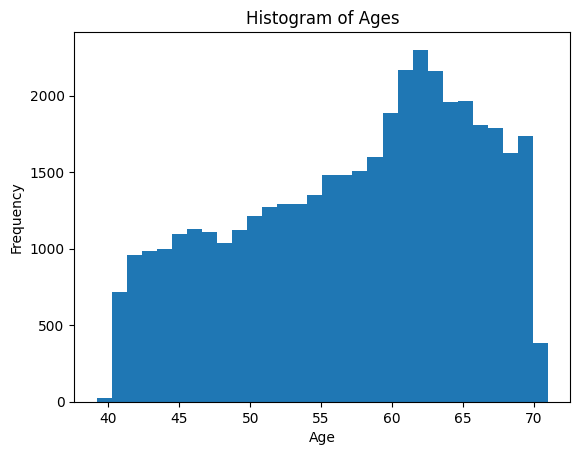

In [146]:
# 所有的 age 绘图

df_combined = pd.concat([Odata_train_with_age.obs, Odata_test_with_age.obs])

import matplotlib.pyplot as plt

plt.hist(df_combined['age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages')
plt.show()

In [147]:
def ageCluster(adata):
    Odata = adata.copy()

    # 定义年龄分段
    bins = [30, 40, 50, 60, 70, 80]
    labels = ['30-40','40-50', '50-60', '60-70','70-80']
    
    # 使用 cut 方法进行分类
    Odata.obs['Age_Group'] = pd.cut(Odata.obs['age'], bins=bins, labels=labels, right=False)

    print(Odata.obs)

    age_group_counts = Odata.obs['Age_Group'].value_counts().sort_index()
    print(age_group_counts)

    return Odata

In [148]:
Odata_train_with_age_cluster = ageCluster(Odata_train_with_age)
Odata_test_with_age_cluster = ageCluster(Odata_test_with_age)

         sex  DoB_Year  DoB_Month  DoB_Day         DoB Date_Attend        age  \
Id                                                                              
2144829    0      1939          1       15  1939-01-15  2007-11-16  68.835044   
3154285    0      1945          1       15  1945-01-15  2007-07-20  62.507871   
1679423    1      1945         11       15  1945-11-15  2009-05-19  63.507187   
1172610    1      1941         12       15  1941-12-15  2009-09-23  67.772758   
4011532    1      1954          1       15  1954-01-15  2009-10-20  55.761807   
...      ...       ...        ...      ...         ...         ...        ...   
1137580    1      1957          5       15  1957-05-15  2007-08-14  50.247775   
3378384    0      1950          4       15  1950-04-15  2009-06-27  59.200548   
1220136    0      1945          6       15  1945-06-15  2008-11-11  63.408624   
4988172    0      1956          1       15  1956-01-15  2010-07-13  54.491444   
5677442    1      1963      

In [149]:
unique_clusters = Odata_test_with_age_cluster.obs['sex'].unique()

print(unique_clusters)
num_clusters = len(unique_clusters)
print(f"Total {num_clusters} of the cluster labels.")

cluster_sizes = Odata_test_with_age_cluster.obs['sex'].value_counts()
print(cluster_sizes)

[0 1]
Total 2 of the cluster labels.
sex
0    2214
1    1931
Name: count, dtype: int64


In [150]:
# The cluster for the total data


# 定义年龄分段
bins = [30, 40, 50, 60, 70, 80]
labels = ['30-40','40-50', '50-60', '60-70','70-80']

# 使用 cut 方法进行分类
df_combined['Age_Group'] = pd.cut(df_combined['age'], bins=bins, labels=labels, right=False)

# print(df_combined)

age_group_counts = df_combined['Age_Group'].value_counts().sort_index()
print(age_group_counts)

Age_Group
30-40        1
40-50     9435
50-60    13350
60-70    18400
70-80      263
Name: count, dtype: int64


In [151]:
Odata_train_with_age_cluster.obs

,sex,DoB_Year,DoB_Month,DoB_Day,DoB,Date_Attend,age,Age_Group
Id,,,,,,,,
2144829,0,1939,1,15,1939-01-15,2007-11-16,68.835044,60-70
3154285,0,1945,1,15,1945-01-15,2007-07-20,62.507871,60-70
1679423,1,1945,11,15,1945-11-15,2009-05-19,63.507187,60-70
1172610,1,1941,12,15,1941-12-15,2009-09-23,67.772758,60-70
4011532,1,1954,1,15,1954-01-15,2009-10-20,55.761807,50-60
...,...,...,...,...,...,...,...,...
1137580,1,1957,5,15,1957-05-15,2007-08-14,50.247775,50-60
3378384,0,1950,4,15,1950-04-15,2009-06-27,59.200548,50-60
1220136,0,1945,6,15,1945-06-15,2008-11-11,63.408624,60-70


In [152]:
Odata_test_with_age_cluster.obs

,sex,DoB_Year,DoB_Month,DoB_Day,DoB,Date_Attend,age,Age_Group
Id,,,,,,,,
4365741,0,1947,12,15,1947-12-15,2008-05-28,60.451745,60-70
4192150,1,1951,3,15,1951-03-15,2010-01-26,58.869268,50-60
1847588,0,1948,1,15,1948-01-15,2010-02-13,62.080767,60-70
2209343,0,1943,3,15,1943-03-15,2009-11-24,66.696783,60-70
4713095,1,1962,3,15,1962-03-15,2006-06-10,44.238193,40-50
...,...,...,...,...,...,...,...,...
2503594,0,1947,2,15,1947-02-15,2009-08-13,62.491444,60-70
3494250,1,1945,12,15,1945-12-15,2009-11-10,63.904175,60-70
5746191,1,1951,12,15,1951-12-15,2009-06-26,57.530459,50-60


### Save data

In [153]:
Odata_train_with_age_cluster

AnnData object with n_obs × n_vars = 37304 × 2919
    obs: 'sex', 'DoB_Year', 'DoB_Month', 'DoB_Day', 'DoB', 'Date_Attend', 'age', 'Age_Group'
    var: 'gene_name'

In [62]:
Odata_train_with_age_cluster.write("../../data/3-OLINK_data_train_withOutlier_all.h5ad")
Odata_test_with_age_cluster.write("../../data/3-OLINK_data_test_withOutlier_all.h5ad")